<a href="https://colab.research.google.com/github/phycoding/my_first_blog/blob/main/BasicNeuralNetwork_TrainingAndEvaluation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [69]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [70]:
x_train[0].shape

(32, 32, 3)

In [71]:
Name = ('Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck')

In [72]:
def show_img(index):
  plt.imshow(x_train[index],interpolation='nearest')
  plt.axis('off')
  plt.title(Name[int(y_train[index])])
  plt.show()

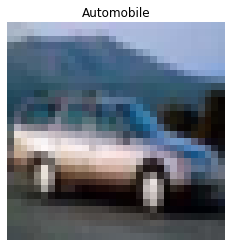

In [73]:
show_img(4)

In [74]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
img_labels = le.fit_transform(y_train)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(50000, 10)

In [75]:
img_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
NetA = keras.models.Sequential([
                                keras.layers.Flatten(input_shape = x_train[0].shape),
                                keras.layers.Dense(10,activation='sigmoid'),                             
])
NetA.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [77]:
NetA.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [78]:
NetA.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 121.7654 - accuracy: 0.2145
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 88.3842 - accuracy: 0.2584
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 82.4413 - accuracy: 0.2709
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 85.0645 - accuracy: 0.2705
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 86.5304 - accuracy: 0.2759
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 85.7632 - accuracy: 0.2754
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 83.5824 - accuracy: 0.2835
Epoch 8/50
1563/1563 [==============================] - 3s 2ms/step - loss: 81.8989 - accuracy: 0.2797
Epoch 9/50
1563/1563 [==============================] - 3s 2ms/step - loss: 84.0133 - accuracy: 0.2786
Epoch 10/50
1563/1563 [==============================] - 3s 2ms/step - l

In [79]:
x_train[0].shape

(32, 32, 3)

In [80]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [81]:
NetB = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(44, activation='relu'),
        keras.layers.Dense(10,activation='softmax'),
])

NetB.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [82]:
NetB.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 44)                5676      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                450       
Total params: 415,982
Trainable params: 415,982
Non-trainable params: 0
_________________________________________________________________


In [83]:
NetB.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9882 - accuracy: 0.2726
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6997 - accuracy: 0.3930
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6232 - accuracy: 0.4160
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5708 - accuracy: 0.4393
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5227 - accuracy: 0.4581
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4947 - accuracy: 0.4634
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4781 - accuracy: 0.4728
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4536 - accuracy: 0.4793
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4385 - accuracy: 0.4878
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.419

In [84]:
NetC = keras.models.Sequential(
    [
        keras.layers.Conv2D(25, kernel_size=(5, 5), activation="relu",input_shape=x_train[0].shape),
        keras.layers.MaxPool2D(pool_size=(2, 2),strides =2 ),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

NetC.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 25)        1900      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 25)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                49010     
Total params: 50,910
Trainable params: 50,910
Non-trainable params: 0
_________________________________________________________________


In [85]:
NetC.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
NetC.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7411 - accuracy: 0.3717
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3305 - accuracy: 0.5321
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2018 - accuracy: 0.5823
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1243 - accuracy: 0.6087
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0366 - accuracy: 0.6455
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0067 - accuracy: 0.6514
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9636 - accuracy: 0.6678
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9228 - accuracy: 0.6798
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9023 - accuracy: 0.6887
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.880

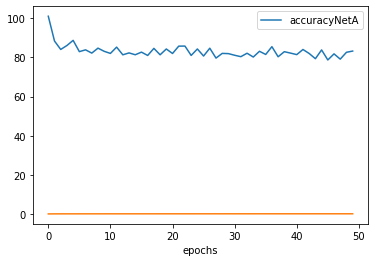

In [89]:
plt.plot(pd.DataFrame(NetA.history.history))
plt.xlabel('epochs')
plt.legend(['accuracy'+'NetA'], loc='upper right')

313/313 [==============================] - 1s 2ms/step - loss: 2.9662 - accuracy: 0.1507
[2.966235399246216, 0.15070000290870667]
313/313 [==============================] - 1s 2ms/step - loss: 1.4821 - accuracy: 0.4936
[1.4821497201919556, 0.4936000108718872]
313/313 [==============================] - 1s 2ms/step - loss: 1.5970 - accuracy: 0.5963
[1.5969849824905396, 0.5963000059127808]


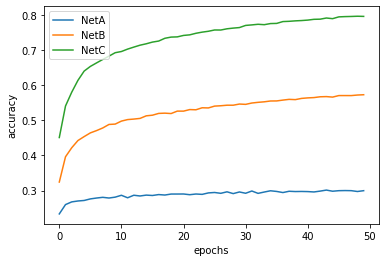

In [100]:
import pandas as pd
nets = [NetA,NetB,NetC]
Names = ['NetA','NetB','NetC']
for net in nets:
  plt.plot(pd.DataFrame(net.history.history)['accuracy'])
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  print(net.evaluate(x_test,y_test))
plt.legend(Names,loc = 'upper left')
plt.show()